## Basic Libraries

In [5]:
import numpy as np

Import preprocessed Data

In [ ]:
# Load training data
X_train = np.load('../processed-data/X_train.npy')
y_train = np.load('../processed-data/y_train.npy')


# Data Augmentation

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,       # Reduced rotation range
    width_shift_range=0.1,   # Reduced horizontal shift
    height_shift_range=0.1,  # Reduced vertical shift
    horizontal_flip=True,    # Keep horizontal flip
)


# Use ImageDataGenerator to create an augmented image generator
train_generator = datagen.flow(X_train, y_train, batch_size=32)

## Introduce a validation set

In [30]:
from sklearn.model_selection import train_test_split
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

train_generator = datagen.flow(X_train, y_train, batch_size=32)
validation_generator = ImageDataGenerator().flow(X_val, y_val)

## Importing **"keras"** for CNN

In [31]:
from tensorflow.keras import models , layers
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential([
    layers.Conv2D(filters = 80 , kernel_size = (3,3),activation = 'relu',input_shape= (32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 40 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 20 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(10,activation = 'relu'),
    layers.Dense(2,activation = 'sigmoid'),
                         ])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(train_generator, epochs=10, steps_per_epoch=len(X_train) // 32, validation_data=validation_generator, callbacks=[early_stopping])



c:\Users\P2001\anaconda3\envs\dlp\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\P2001\anaconda3\envs\dlp\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 75s 35ms/step - accuracy: 0.7231 - loss: 0.5279 - val_accuracy: 0.7849 - val_loss: 0.4952
Epoch 2/10


c:\Users\P2001\anaconda3\envs\dlp\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7849 - val_loss: 0.4952
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 72s 36ms/step - accuracy: 0.8405 - loss: 0.3629 - val_accuracy: 0.7989 - val_loss: 0.5278
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7989 - val_loss: 0.5278
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 73s 37ms/step - accuracy: 0.8665 - loss: 0.3167 - val_accuracy: 0.7650 - val_loss: 0.6148


In [32]:
# Load test data
X_test = np.load('../processed-data/X_test.npy')
y_test = np.load('../processed-data/y_test.npy')

In [33]:
model.evaluate(X_test,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9085 - loss: 0.2296


[0.48333531618118286, 0.7858999967575073]

In [34]:
y_pred  = model.predict(X_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step


In [35]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:5]

[0, 0, 0, 0, 0]

## Classification Report

In [36]:
from sklearn.metrics import classification_report

print('Classification Report     : \n\n\n' , classification_report(y_test,y_pred_label))

Classification Report     : 


               precision    recall  f1-score   support

           0       0.71      0.96      0.82     10000
           1       0.94      0.61      0.74     10000

    accuracy                           0.79     20000
   macro avg       0.83      0.79      0.78     20000
weighted avg       0.83      0.79      0.78     20000



## Confusion Matrix 

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred_label)

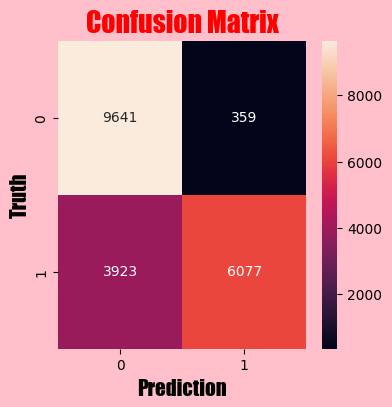

In [38]:
import matplotlib.pyplot as plt
import seaborn as sn


plt.figure(figsize=(4,4), facecolor= 'pink', edgecolor='brown')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction', fontdict= {'family':'fantasy','color':'black','size':15})
plt.ylabel('Truth', fontdict= {'family':'fantasy','color':'black','size':15})
plt.title('Confusion Matrix',fontdict= {'family':'fantasy','color':'red','size':20})
plt.show()

## **THANK YOU !**